## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Importing networks



In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

-----
## Import network and compute skim for a city
Here we download city graph, compute the skims and save to graphml and csvs
for future use in ExMAS

It:
* loads data for `params.city` 
* computes the skim, 
* saves the files into `params.paths.skim` and `params.paths.G`

#### Download single city and save skims

In [3]:
params = ExMAS.utils.get_config('ExMAS/data/configs/ams-config-1.json')

In [4]:
params.city = 'Delft, Netherlands'
params = ExMAS.utils.make_paths(params) #update file paths

In [5]:
from ExMAS.utils import inData as inData

In [6]:
inData = ExMAS.utils.load_G(inData, params) # download the graph and compute the skim

----

#### Some osmnx tutorial
we import graphs with `osmnx` 

for different cities, change the string

--- 
### 1. Import driveable network for `Delft`

In [7]:
#small imports
import sys
import random
import time
import pprint
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 16]

In [8]:
#big imports
import osmnx as ox #OSM download and parse
import pandas as pd 
import networkx as nx #graphs

In [9]:
G = ox.graph_from_place('Amsterdam, Netherlands', network_type='drive')

### 2. Plot it

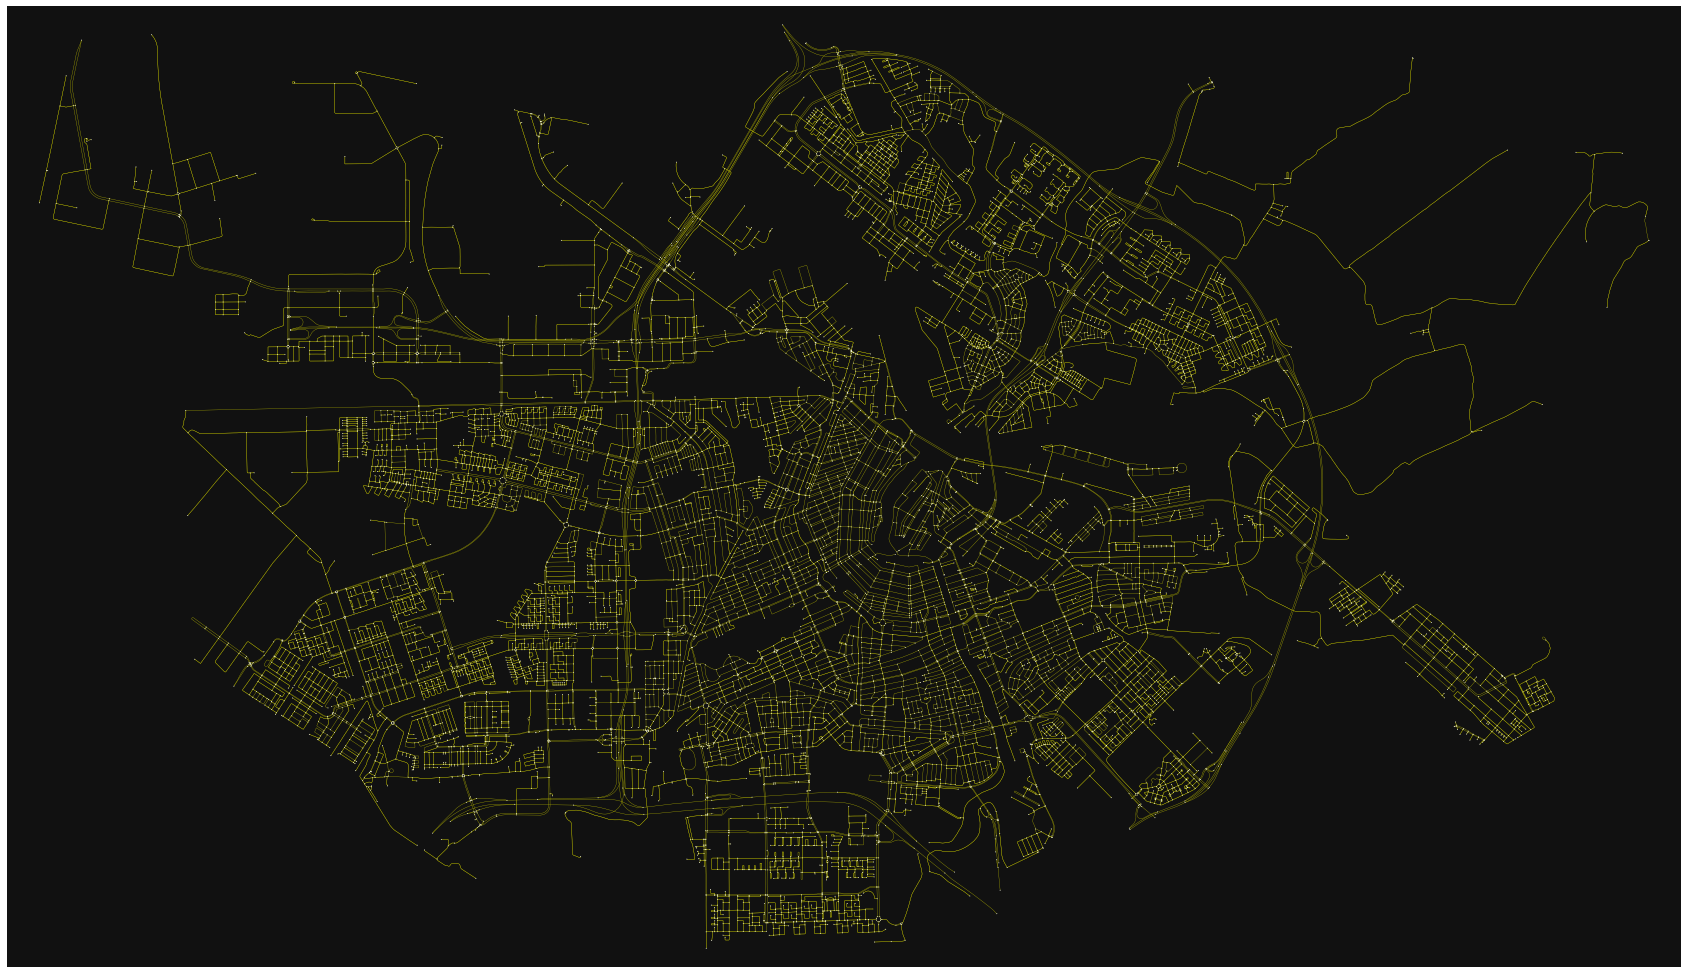

In [10]:
_ = ox.plot_graph(G,figsize=(30, 30), edge_color='y',node_size=0.8, edge_linewidth=0.3)

#### * Network stats

In [11]:
pprint.pprint(ox.basic_stats(G))

{'circuity_avg': 1.079694087463106,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 97.29877395092576,
 'edge_length_total': 2613153.1720000133,
 'intersection_count': 10139,
 'intersection_density_km': None,
 'k_avg': 4.610248047377907,
 'm': 26857,
 'n': 11651,
 'node_density_km': None,
 'self_loop_proportion': 0.004728748557173176,
 'street_density_km': None,
 'street_length_avg': 101.550125153231,
 'street_length_total': 1739655.1940000001,
 'street_segments_count': 17131,
 'streets_per_node_avg': 2.9411209338254225,
 'streets_per_node_counts': {0: 0,
                             1: 1512,
                             2: 214,
                             3: 7452,
                             4: 2396,
                             5: 75,
                             6: 2},
 'streets_per_node_proportion': {0: 0.0,
                                 1: 0.12977426830314995,
                                 2: 0.018367

### 3. Graph data

In [12]:
G.get_edge_data(1501364225, 1402613311)

#### DataFrame and .csv export

In [13]:
df = nx.to_pandas_edgelist(G)
df.to_csv('Delft.csv')
df.head()

,source,target,oneway,length,maxspeed,width,geometry,tunnel,lanes,junction,osmid,access,est_width,name,highway,bridge,ref
0,6316199,46379627,False,42.497,NaN,NaN,"LINESTRING (4.8883961 52.3701725, 4.8882715 52...",NaN,NaN,NaN,"[38297120, 7372610, 38297119]",NaN,NaN,"[Oude Spiegelstraat, Joes Kloppenburgbrug]",unclassified,yes,NaN
1,6316199,46389218,True,225.577,30,NaN,"LINESTRING (4.8883961 52.3701725, 4.8887342 52...",NaN,NaN,NaN,7372614,NaN,NaN,Singel,residential,NaN,NaN
2,25596477,4489285115,False,80.689,NaN,NaN,"LINESTRING (4.9060967 52.367, 4.9061204 52.367...",NaN,NaN,NaN,23289375,NaN,NaN,Nieuwe Herengracht,unclassified,NaN,NaN
3,25658579,1334338691,False,39.281,30,NaN,"LINESTRING (4.9304379 52.3645437, 4.9299769 52...",NaN,NaN,NaN,"[118689924, 118689927]",NaN,NaN,Roomtuintjes,residential,NaN,NaN
4,26203121,2311089467,True,193.316,30,NaN,"LINESTRING (4.8652355 52.3641616, 4.8654981 52...",NaN,1,NaN,"[7373692, 7382053]",NaN,NaN,"[Nicolaas Beetsplantsoen, Jacob van Lennepkade]",unclassified,NaN,NaN


### 4. Graph searches 

In [14]:
node_list = list(G.nodes)
o = random.choice(node_list)
d = random.choice(node_list)

In [15]:
print(o,d)

46406617 46206853


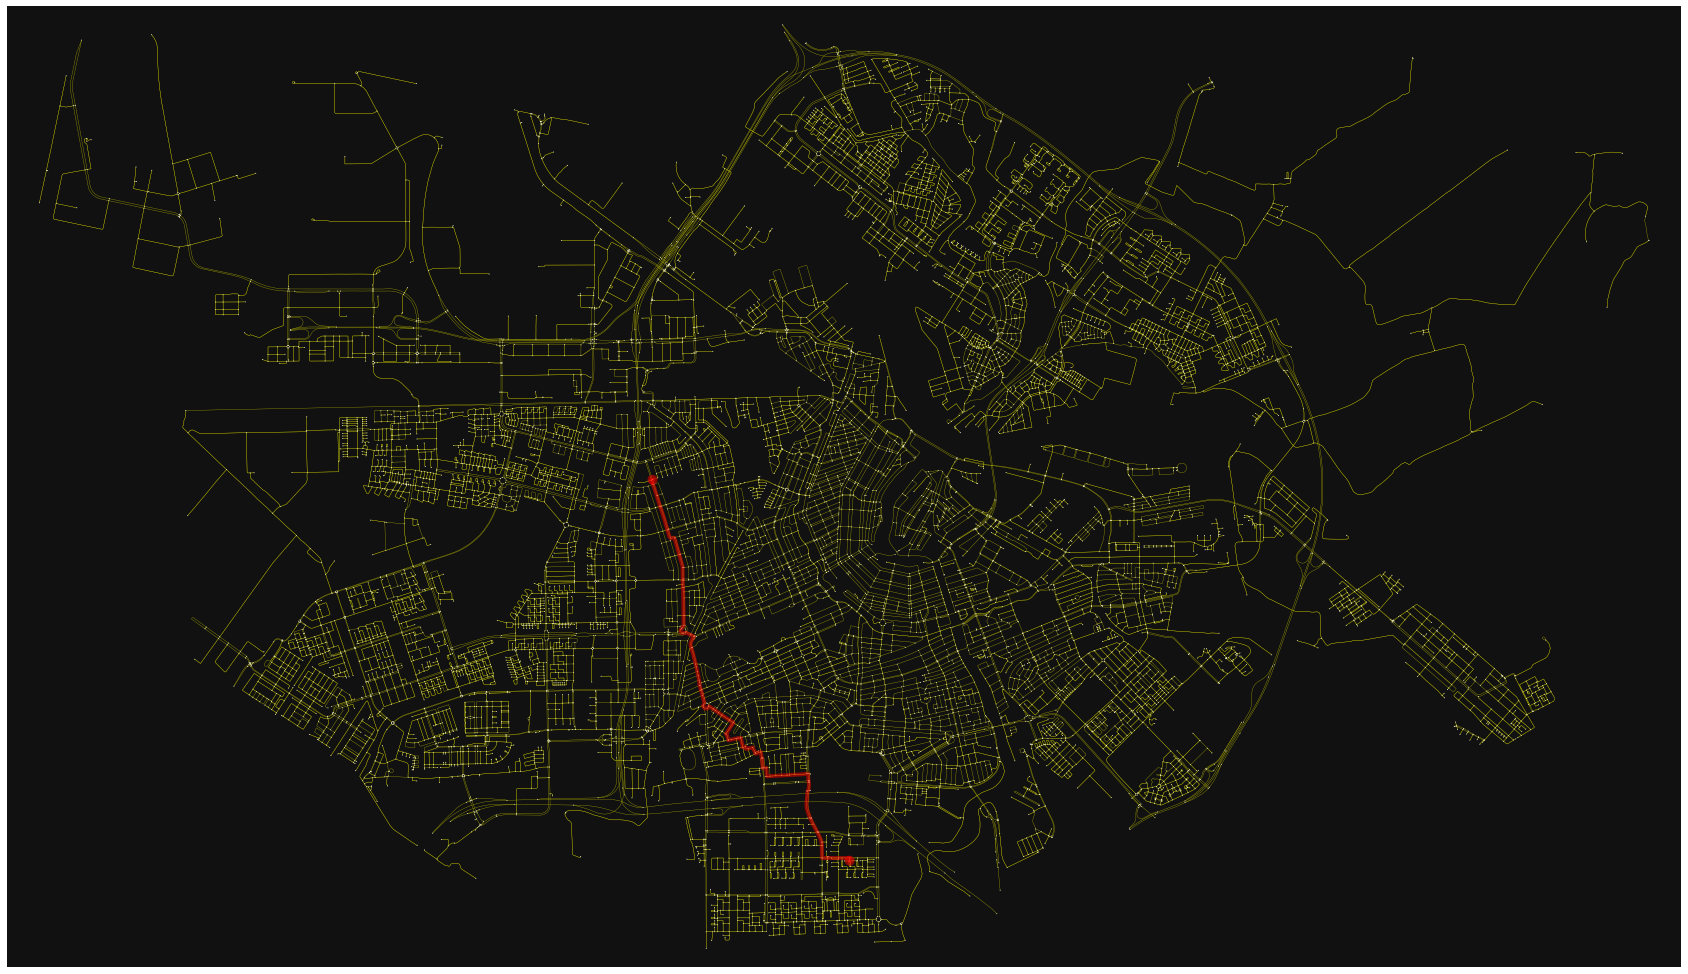

In [16]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, o, d, weight='length')
fig, ax = ox.plot_graph_route(G, route, figsize=(30, 30), edge_color='y',node_size=0.8, edge_linewidth=0.3)

In [17]:
print("Shorthest path from node {} to node {} distance: {}m".format(o,d,nx.shortest_path_length(G, o, d, weight='length')))

Shorthest path from node 46406617 to node 46206853 distance: 6943.611999999997m


### 5. Skim matrices

In [18]:
skim = dict(nx.all_pairs_dijkstra_path_length(G, weight = 'length')) # may take some time

In [20]:
len(skim)

11651

In [19]:
s_dist = 200


In [17]:
for d, dist in skim[27082148].items():
    if dist < s_dist:
        print(d,dist)

27082148 0
44835830 39.821
44835282 66.323
44834686 86.469
44833192 124.181
44836988 130.03699999999998
44839614 141.011
549920740 149.486
44837783 182.91599999999997
44832731 183.44
44830594 195.427


In [29]:
o = random.choice(node_list)
d = random.choice(node_list)
print("From node {} to node {} distance: {}m".format(o,d,round(skim[o][d])))

From node 1391417404 to node 626009950 distance: 2802m


-------------
Rafal Kucharski, 2019, Delft, r.m.kucharski@tudelft.nl

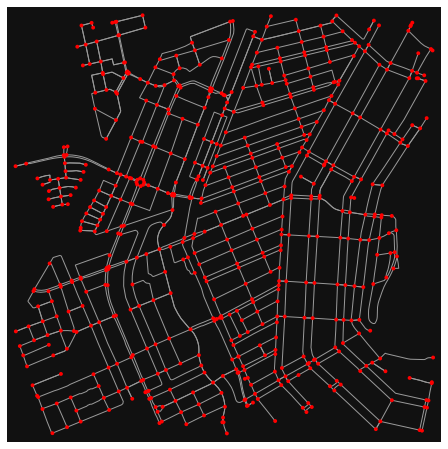

In [40]:
point = 52.372889, 4.878671
G = ox.graph_from_point(point, network_type='drive', dist=1000)
fig, ax = ox.plot_graph(G, node_color='r')

In [41]:
G_proj = ox.project_graph(G)
intersections = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(intersections)

401

In [42]:
len(G)

589

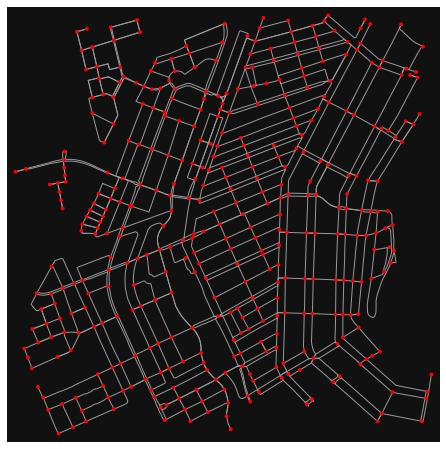

In [43]:
fig, ax = ox.plot_graph(intersections, node_color='r')

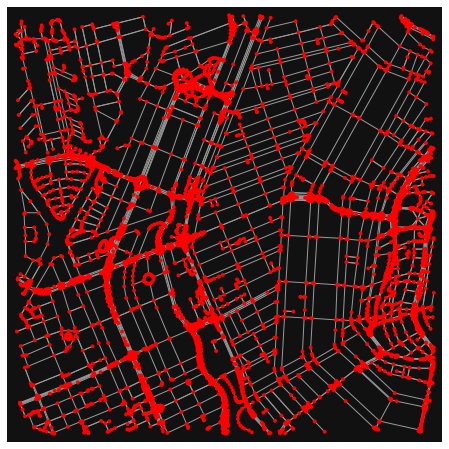

In [31]:
G = ox.graph_from_point(point, dist=1000, simplify=False)
fig, ax = ox.plot_graph(G, node_color='r')

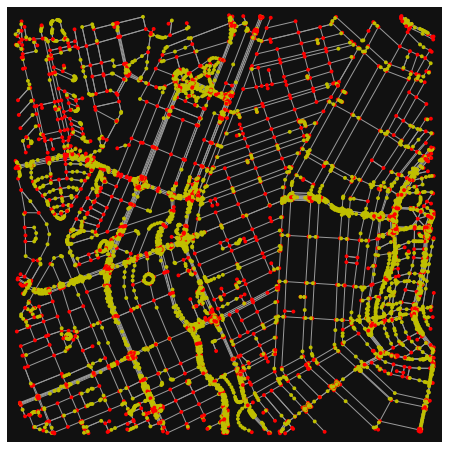

In [32]:
# show which nodes we'd remove if we simplify it (yellow)
nc = ['r' if ox.simplification._is_endpoint(G, node) else 'y' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

In [33]:
G2 = ox.simplify_graph(G)

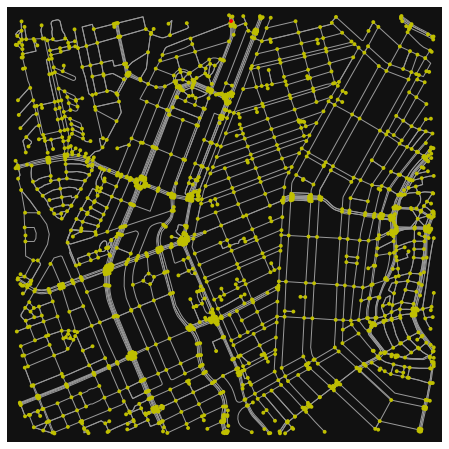

In [34]:
# plot the simplified network and highlight any self-loop edges
loops = [edge[0] for edge in nx.selfloop_edges(G2)]
nc = ['r' if node in loops else 'y' for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc)

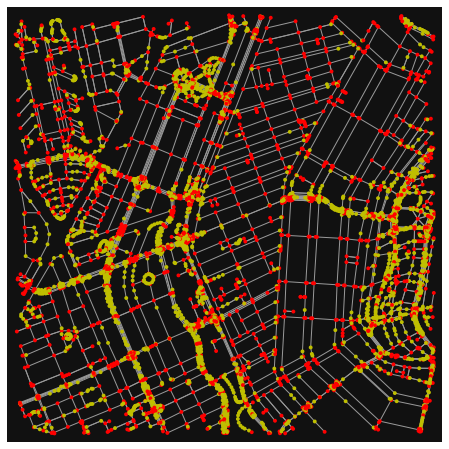

In [35]:
# turn off strict mode and see what nodes we'd remove
nc = ['r' if ox.simplification._is_endpoint(G, node, strict=False) else 'y' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

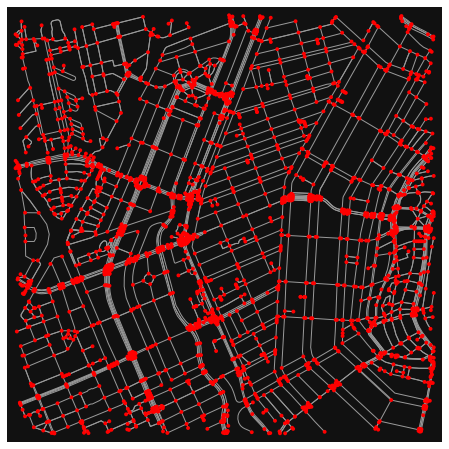

In [36]:
# simplify network with strict mode turned off
G3 = ox.simplify_graph(G.copy(), strict=False)
fig, ax = ox.plot_graph(G3, node_color='r')